In [5]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from matplotlib import style
import bs4 as bs
import pickle
import requests
import csv
%matplotlib inline

In [2]:
# Getting the list of S&P500 companies from wikipedia

response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [3]:
src = response.content

In [4]:
soup = bs.BeautifulSoup(src, 'lxml')

In [5]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of S&amp;P 500 companies - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_S\u0026P_500_companies","wgTitle":"List of S\u0026P 500 companies","wgCurRevisionId":919373096,"wgRevisionId":919373096,"wgArticleId":2676045,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Articles with short description","S\u0026P Dow Jones Indices","Lists of companies","Standard \u0026 Poor's"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","Nove

In [6]:
# Because the necessary information is in a table, wit BS, searching for all the tables

table = soup.find('table')

In [7]:
print(table)

<table class="wikitable sortable" id="constituents">
<tbody><tr>
<th><a href="/wiki/Symbol" title="Symbol">Symbol</a>
</th>
<th>Security</th>
<th><a href="/wiki/SEC_filing" title="SEC filing">SEC filings</a></th>
<th><a href="/wiki/Global_Industry_Classification_Standard" title="Global Industry Classification Standard">GICS</a> Sector</th>
<th>GICS Sub Industry</th>
<th>Headquarters Location</th>
<th>Date first added</th>
<th><a href="/wiki/Central_Index_Key" title="Central Index Key">CIK</a></th>
<th>Founded
</th></tr>
<tr>
<td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>
</td>
<td><a href="/wiki/3M" title="3M">3M Company</a></td>
<td><a class="external text" href="https://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany" rel="nofollow">reports</a></td>
<td>Industrials</td>
<td>Industrial Conglomerates</td>
<td><a class="mw-redirect" href="/wiki/St._Paul,_Minnesota" title="St. Paul, Minnesota">St. Paul, Minnesota</a></td>
<td

In [8]:
# Putting all the ticker symbols and sectors into a list

tickers = []
sectors = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
    
    sect = row.findAll('td')[3].text
    sectors.append(sect)

In [13]:
# Cleaning the tickers

tickers_clean = []
for thing in tickers:
    thing.replace('\n','')
    tickers_clean.append(thing[:-1])

In [3]:
print(tickers_clean)

NameError: name 'tickers_clean' is not defined

In [4]:
# Tickers and sectors are going into a DataFrame

datatable = pd.DataFrame(tickers_clean)

NameError: name 'tickers_clean' is not defined

In [ ]:
datatable['Sector'] = sectors

In [40]:
datatable.columns = ['Ticker', 'Sector'] # Renaming the columns

In [41]:
datatable.to_csv('TickerSector.csv') # Creating a csv file containing all the tickers and sectors in one file

In [3]:
database = pd.read_csv('TickerSector.csv', index_col = 'Unnamed: 0')
cols = ['Ticker', 'Sector']

In [4]:
print(database.head()) # The csv file has been read, columns has been named

  Ticker                  Sector
0    MMM             Industrials
1    ABT             Health Care
2   ABBV             Health Care
3   ABMD             Health Care
4    ACN  Information Technology


In [5]:
database.columns = cols

In [16]:
#Defining the dates I'll be working with, which is necessary to get the basic amount of data

ma = date.today() - timedelta(days = 1)
tegnap = date.today() - timedelta(days = 2)
tegnappéntek = date.today() - timedelta(days = 4)
mayear = ma.year
mamonth = ma.month
maday = ma.day
tegnapyear = tegnap.year
tegnapmonth = tegnap.month
tegnapday = tegnap.day
tegpéntekyear = tegnappéntek.year
tegpéntekmonth = tegnappéntek.month
tegpéntekday = tegnappéntek.day
end = datetime(mayear,mamonth,maday)
start = datetime(tegnapyear,tegnapmonth,tegnapday)
startpéntek = datetime(tegpéntekyear,tegpéntekmonth,tegpéntekday)
tickers = database['Ticker']
print(date.today().weekday())
print(startpéntek)
print(start)
print(ma)

1
2019-12-06 00:00:00
2019-12-09 00:00:00
2019-12-10


In [24]:
sp500 = '^GSPC'
result = []
if date.today().weekday() == 0:
    sp500_data = DataReader(sp500, data_source, startpéntek, end)
    tikk = sp500_data['Adj Close'].pct_change()
    result.append(tikk)
else:
    sp500_data = DataReader(sp500, data_source, start, end)
    tikk = sp500_data['Adj Close'].pct_change()
    result.append(tikk)

In [25]:
print(result)

[Date
2019-12-02    NaN
2019-12-02    0.0
Name: Adj Close, dtype: float64]


In [7]:
data_source = 'yahoo'
totalstart = datetime(2018,9,1)
totalend = datetime(2019,12,7)
for ticker in tickers:
    try:
        stock_data = DataReader(ticker, data_source, totalstart, totalend)
        table = pd.DataFrame(stock_data)
        table.to_csv('{}.csv'.format(ticker))
    except:
        pass

In [20]:
datetoday = datetime.today()
start1 = datetime(datetoday.year,datetoday.month,datetoday.day)
for ticker in tickers[0:2]:
    fields = DataReader(ticker, data_source, start1)
    with open(r'{}.csv'.format(ticker), 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields)

In [12]:
# Creating new columns to examine the changes of the stock market (100 and 200 day moving average, plus daily percentage changes)

for item in tickers:
    try:
        item2 = pd.read_csv('{}.csv'.format(item))
        item2['100MA'] = item2['Adj Close'].rolling(window = 100).mean().bfill()
        item2['200MA'] = item2['Adj Close'].rolling(window = 200).mean().bfill()
        item2['100check'] = item2['100MA'] - item2['Adj Close']
        item2['200check'] = item2['200MA'] - item2['Adj Close']
        item2['Change'] = item2['Adj Close'].pct_change()*100
        item2.to_csv('{}.csv'.format(item))
    except:
        pass

In [7]:
# Getting the results of a trading day, and writting it to the csv file
data_source = 'yahoo'
for ticker in tickers:
    try:
        if date.today().weekday() == 0:
            stock_data = DataReader(ticker, data_source, startpéntek, end)
            with open(r'{}.csv'.format(ticker), 'a') as f:
                writer = csv.writer(f)
                writer.writerow(stock_data)
        else:
            stock_data = DataReader(ticker, data_source, start, end)
            with open(r'{}.csv'.format(ticker), 'a') as f:
                writer = csv.writer(f)
                writer.writerow(stock_data)
    except:
        pass

In [ ]:
# Creating the plus information for the new data (100MA, 200MA, change)
for item in tickers:
    try:
        item2 = pd.read_csv('{}.csv'.format(item))
        item2['100MA'] = item2['Adj Close'].rolling(window = 100).mean()
        item2['200MA'] = item2['Adj Close'].rolling(window = 200).mean()
        item2['100check'] = item2['100MA'] - item2['Adj Close']
        item2['200check'] = item2['200MA'] - item2['Adj Close']
        item2['Change'] = item2['Adj Close'].pct_change()*100
        item2.to_csv('{}.csv'.format(item))
    except:
        pass

In [18]:
#Getting the daily change of each stock
change = {}
data_source = 'yahoo'
for ticker in tickers:
    try:
        if date.today().weekday() == 1:
            stock_data = DataReader(ticker, data_source, startpéntek, end)
            stock_data['Change'] = stock_data['Adj Close'].pct_change()
            change[ticker] = stock_data.Change
        else:
            stock_data = DataReader(ticker, data_source, start, end)
            stock_data['Change'] = stock_data['Adj Close'].pct_change()
            change[ticker] = stock_data.Change
    except:
        pass

In [19]:
print(start)
print(end)

2019-12-09 00:00:00
2019-12-10 00:00:00


In [40]:
stockprice = {}
for item, value in change.items():
    for egy in value:
        if egy > 0.0 or egy < 0.0:
            stockprice[item] = egy

In [41]:
print(stockprice)

{'MMM': -0.009564351653194136, 'ABT': -0.018834821562053294, 'ABBV': -0.006208334038702912, 'ABMD': -0.039794940971985326, 'ACN': -0.002567288396080891, 'ATVI': -0.014852376533634803, 'ADBE': 0.002677650057875125, 'AMD': -0.017663405098988116, 'AAP': -0.01972570100430504, 'AES': 0.0037394019626333375, 'AMG': -0.013695401671143692, 'AFL': 0.0011322430023272823, 'A': -0.007176698022881456, 'APD': -0.005214806108881809, 'AKAM': -0.013372426858046182, 'ALK': -0.0048302375955614485, 'ALB': 0.006531853017288869, 'ARE': 0.0028405054226461335, 'ALXN': -0.012380332252798332, 'ALGN': -0.00819675669381692, 'ALLE': 0.008943804319270887, 'AGN': -0.005902188515028439, 'ADS': 0.001425057218645831, 'LNT': -0.004330625863173121, 'ALL': 0.0019802090344256396, 'GOOGL': 0.002687772453554116, 'GOOG': 0.002193062528733636, 'MO': 0.002380458882126568, 'AMZN': -0.0011931752965532727, 'AMCR': -0.003820435609633299, 'AEE': -0.0031919625871341673, 'AAL': -0.00865487829354683, 'AEP': -0.005736538400240021, 'AXP':

In [46]:
minta = pd.DataFrame(stockprice, index = [0]).transpose()

In [47]:
print(minta.head())

             0
MMM  -0.009564
ABT  -0.018835
ABBV -0.006208
ABMD -0.039795
ACN  -0.002567


In [48]:
minta.columns = ['Result']

In [49]:
minta['Result'] = minta['Result']*100

In [52]:
print(minta.sort_values(by = 'Result'))

         Result
IFF   -5.794140
ABMD  -3.979494
ULTA  -3.646076
IPGP  -3.239887
STX   -3.170033
MU    -3.087835
AOS   -3.013464
HFC   -3.003531
TFX   -2.989049
CNC   -2.968189
TTWO  -2.966141
MPC   -2.940200
WAB   -2.874532
DXC   -2.676659
LB    -2.413021
TMUS  -2.405448
MKTX  -2.362332
OXY   -2.302452
ISRG  -2.117599
ABC   -2.096553
WDC   -2.078240
AAP   -1.972570
EW    -1.962508
BAX   -1.947812
ABT   -1.883482
WCG   -1.816947
MOS   -1.781971
REGN  -1.781015
AMD   -1.766341
SYK   -1.759896
...         ...
NVR    1.156192
UNM    1.161599
MAC    1.251381
DHI    1.273060
KR     1.273192
QCOM   1.312334
PRGO   1.338690
LOW    1.367392
CAG    1.384082
RL     1.414885
CCL    1.429527
UA     1.433486
DE     1.628223
UAA    1.635028
QRVO   1.706996
FTV    1.742825
SWKS   1.844912
SLG    1.956268
HBI    2.004009
CTVA   2.019003
M      2.178217
BMY    2.218512
GLW    2.223022
WMB    2.277804
KHC    2.701834
APA    3.201598
KSS    3.308584
JWN    3.594245
FCX    3.951890
NKTR  13.056235

[490 ro

In [183]:
# Analysing a stock by vizualization

Mdata = pd.read_csv('MMM.csv')

In [184]:
Mdata.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-09-04,210.750000,207.550003,210.550003,208.600006,2108500.0,200.431778
1,2018-09-05,211.910004,207.350006,208.289993,211.830002,1951500.0,203.535324
2,2018-09-06,213.369995,211.070007,212.000000,212.740005,2363500.0,204.409683
3,2018-09-07,212.970001,209.970001,212.240005,212.570007,2739200.0,204.246338
4,2018-09-10,216.369995,212.860001,213.679993,212.929993,2399700.0,204.592224


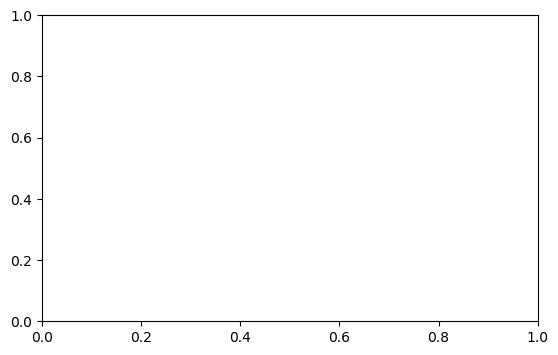

In [185]:
ax = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1, sharex = ax)

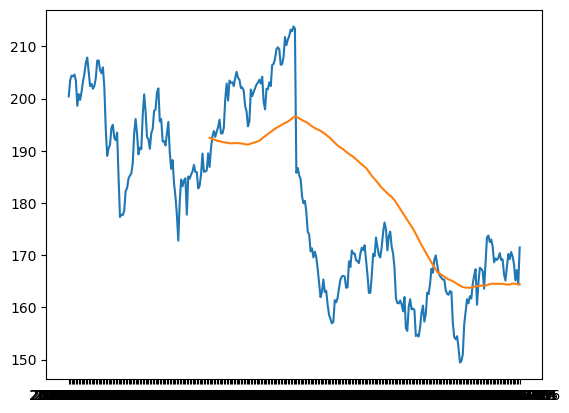

In [186]:
plt.plot(Mdata.Date, Mdata['Adj Close'])
plt.plot(Mdata.Date, Mdata['Adj Close'].rolling(window = 100).mean())

In [187]:
copper = Mdata.copy()
print(copper.head())

         Date        High         Low        Open       Close     Volume  \
0  2018-09-04  210.750000  207.550003  210.550003  208.600006  2108500.0   
1  2018-09-05  211.910004  207.350006  208.289993  211.830002  1951500.0   
2  2018-09-06  213.369995  211.070007  212.000000  212.740005  2363500.0   
3  2018-09-07  212.970001  209.970001  212.240005  212.570007  2739200.0   
4  2018-09-10  216.369995  212.860001  213.679993  212.929993  2399700.0   

    Adj Close  
0  200.431778  
1  203.535324  
2  204.409683  
3  204.246338  
4  204.592224  


In [188]:
time_grouper = 'M'

In [189]:
copper['Date'] = pd.to_datetime(copper.Date)

In [190]:
copper = copper.set_index('Date')
print(copper.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2018-09-04  210.750000  207.550003  210.550003  208.600006  2108500.0   
2018-09-05  211.910004  207.350006  208.289993  211.830002  1951500.0   
2018-09-06  213.369995  211.070007  212.000000  212.740005  2363500.0   
2018-09-07  212.970001  209.970001  212.240005  212.570007  2739200.0   
2018-09-10  216.369995  212.860001  213.679993  212.929993  2399700.0   

             Adj Close  
Date                    
2018-09-04  200.431778  
2018-09-05  203.535324  
2018-09-06  204.409683  
2018-09-07  204.246338  
2018-09-10  204.592224  


In [191]:
#Defining and grouping the data for the given frequency

opener = copper.groupby(pd.Grouper(freq = time_grouper))['Adj Close'].nth([0])

In [192]:
closer = copper.groupby(pd.Grouper(freq = time_grouper))['Adj Close'].nth([-1])

In [193]:
copper = copper.groupby(pd.Grouper(freq = time_grouper))['Adj Close'].agg({'Low': np.min, 'High': np.max}).reset_index()

C:\Users\Zoli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [194]:
copper['Open'] = opener.values

In [195]:
copper['Close'] = closer.values

In [196]:
copper = copper[['Date', 'Open', 'High', 'Low', 'Close']]

In [197]:
copper.tail()

,Date,Open,High,Low,Close
11,2019-08-31,170.313583,170.313583,154.413162,160.331924
12,2019-09-30,157.278366,169.968506,157.278366,162.988922
13,2019-10-31,157.020599,167.608917,149.446182,163.573868
14,2019-11-30,168.630081,173.765625,165.139999,169.770004
15,2019-12-31,168.270004,171.470001,164.369995,171.470001


In [198]:
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
mpl.style.use('default')

In [199]:
copper['Date'] = copper.Date.map(mdates.date2num)

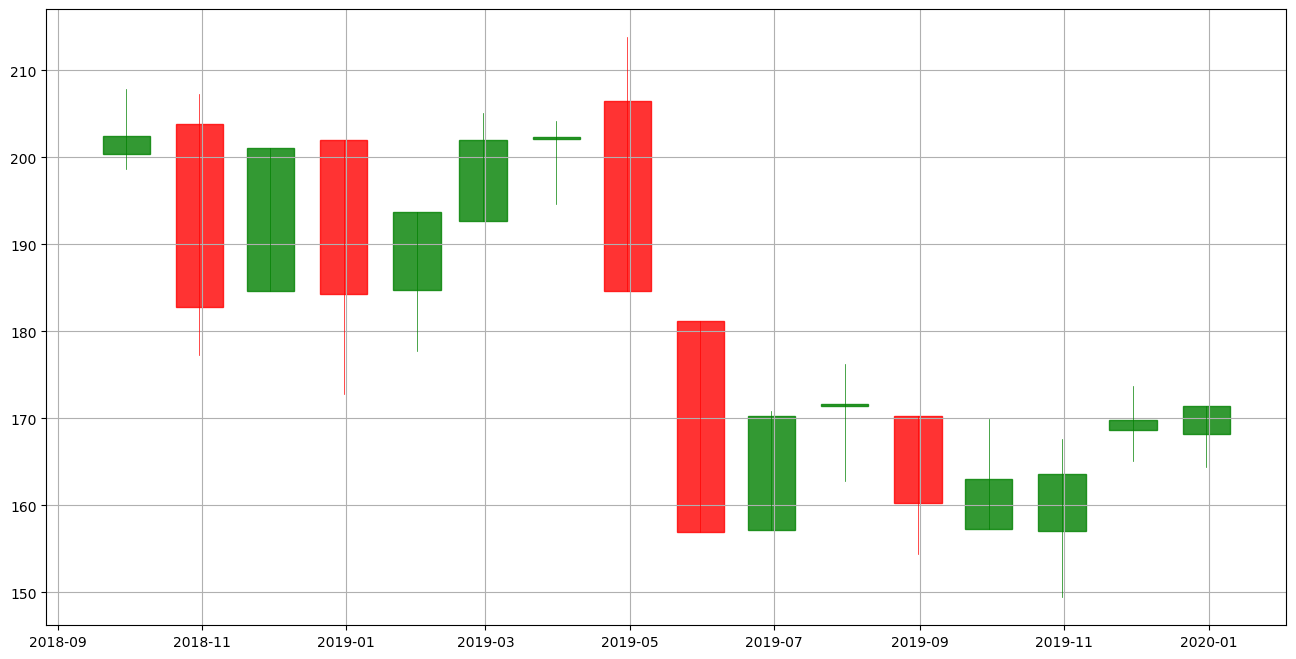

In [200]:
#Candlestick visualization

fig, ax = plt.subplots(figsize = (16, 8))
ax.xaxis_date()
candlestick_ohlc(ax, copper.values, width = 20, colorup = 'g', colordown = 'r', alpha = 0.8)
plt.grid()
plt.show()

In [19]:
# New chapter: Signaling buy possibilities on a daily basis. First step: creating a dataframe with the tickers and a start 
# buying position

buying_pos = pd.DataFrame({'BABA': [170], 'FB':[180], 'DIS': [130], 'SIX': [43], 'UBER': [26.5], 'WYNN': 110, 'TWLO': 91, 'NFLX': 270,
                          'SWKS': 80, 'TSLA':250, 'ATVI': 50, 'MSFT': 130, 'EA': 90, 'JD.CH': 27, 'WMT': 100, 'NVDA': 160, 'HAS': 90,
                          'BA': 310, 'CL': 62, 'TPR': 20, 'MCD': 185, 'SPLK':120, 'JNJ': 130, 'CAT': 120, 'PEP': 120, 'GOOG': 1100, 'BRK.B': 190,
                          'RACE': 110, 'AMZN': 1500, 'BIDU': 105, 'PYPL': 100, 'AMAT': 45, 'MRVL': 22, 'VZ': 55, 'AAPL': 200, 'TTWO': 100, 'CVS': 65,
                          'V': 160, 'MA': 250})

In [21]:
print(buying_pos.transpose())

            0
BABA    170.0
FB      180.0
DIS     130.0
SIX      43.0
UBER     26.5
WYNN    110.0
TWLO     91.0
NFLX    270.0
SWKS     80.0
TSLA    250.0
ATVI     50.0
MSFT    130.0
EA       90.0
JD.CH    27.0
WMT     100.0
NVDA    160.0
HAS      90.0
BA      310.0
CL       62.0
TPR      20.0
MCD     185.0
SPLK    120.0
JNJ     130.0
CAT     120.0
PEP     120.0
GOOG   1100.0
BRK.B   190.0
RACE    110.0
AMZN   1500.0
BIDU    105.0
PYPL    100.0
AMAT     45.0
MRVL     22.0
VZ       55.0
AAPL    200.0
TTWO    100.0
CVS      65.0
V       160.0
MA      250.0
